In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

LOADING AND CLEANING DATA 

In [2]:
df=  pd.read_csv("corona_data_2022.csv")
pd.set_option('display.max_row', None)
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests per 1M pop,Population,Continent
0,USA,"10,18,65,927","11,13,808","9,89,76,943","17,75,176","3,990","3,04,254","3,327","1,14,94,72,864","34,33,258","33,48,05,269",North America
1,India,"4,46,77,449","5,30,680","4,41,42,242","4,527",698,"31,762",377,"90,92,84,443","6,46,427","1,40,66,31,776",Asia
2,France,"3,89,71,117","1,60,747","3,76,86,052","11,24,318",869,"5,94,212","2,451","27,14,90,188","41,39,547","6,55,84,518",Europe
3,Germany,"3,70,88,426","1,60,246","3,63,46,100","5,82,080","1,406","4,42,142","1,910","12,23,32,384","14,58,359","8,38,83,596",Europe
4,Brazil,"3,59,92,620","6,92,210","3,46,63,955","6,36,455","8,318","1,67,133","3,214","6,37,76,166","2,96,146","21,53,53,593",South America


In [17]:
df.shape

(128, 12)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            228 non-null    object
 1   Total Cases        228 non-null    object
 2   Total Deaths       223 non-null    object
 3   Total Recovered    208 non-null    object
 4   Active Cases       209 non-null    object
 5   Serious/critical   141 non-null    object
 6   Tot Cases/ 1M pop  228 non-null    object
 7   Deaths/ 1M pop     223 non-null    object
 8   Total Tests        213 non-null    object
 9   Tests per 1M pop   213 non-null    object
 10  Population         228 non-null    object
 11  Continent          228 non-null    object
dtypes: object(12)
memory usage: 21.5+ KB


In [34]:
#Null in %
(df.isnull().sum()/df.shape[0])*100

Country              0.0
Total Cases          0.0
Total Deaths         0.0
Total Recovered      0.0
Active Cases         0.0
Serious/critical     0.0
Tot Cases/ 1M pop    0.0
Deaths/ 1M pop       0.0
Total Tests          0.0
Tests per 1M pop     0.0
Population           0.0
Continent            0.0
dtype: float64

In [104]:
df.duplicated().sum()

0

In [103]:
df[df['Serious/critical'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests per 1M pop,Population,Continent
10,Turkey,"1,70,42,722","1,01,492",NaN,NaN,NaN,"1,99,186","1,186","16,27,43,369","19,02,052","8,55,61,976",Asia
15,Taiwan,"86,24,680","14,958","83,14,069","2,95,653",NaN,"3,61,038",626,"2,89,83,590","12,13,281","2,38,88,595",Asia
25,Ukraine,"53,50,380","1,10,696","52,30,588","9,096",NaN,"1,23,874","2,563","3,26,03,805","7,54,855","4,31,92,122",Europe
28,DPRK,"47,72,813",74,"47,72,739",0,NaN,"1,83,636",3,NaN,NaN,"2,59,90,679",Asia
46,New Zealand,"20,62,384","3,435","20,17,409","41,540",NaN,"4,21,049",701,"76,77,843","15,67,482","48,98,203",Australia/Oceania
49,Georgia,"18,08,085","16,895","17,76,548","14,642",NaN,"4,55,582","4,257","1,69,20,079","42,63,340","39,68,738",Asia
67,UAE,"10,46,359","2,348","10,28,097","15,914",NaN,"1,03,787",233,"19,77,62,706","1,96,15,842","1,00,81,785",Asia
72,Nepal,"10,00,959","12,019","9,88,921",19,NaN,"33,116",398,"59,85,814","1,98,038","3,02,25,582",Asia
73,Belarus,"9,94,037","7,118","9,85,592","1,327",NaN,"1,05,381",755,"1,36,46,641","14,46,722","94,32,800",Europe
76,Azerbaijan,"8,25,527","9,997","8,14,944",586,NaN,"80,147",971,"74,10,224","7,19,425","1,03,00,205",Asia


In [105]:
#for example if we tack a look to both NA in 'Total Deaths' and 'Serious/critical'
df[df['Total Deaths'].isnull() & df['Serious/critical'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/critical,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests per 1M pop,Population,Continent
219,Tuvalu,"2,805",NaN,NaN,"2,805",NaN,"2,32,471",NaN,NaN,NaN,"12,066",Australia/Oceania
220,Falkland Islands,"1,930",NaN,"1,930",0,NaN,"5,45,352",NaN,"8,632","24,39,107","3,539",South America
221,Saint Helena,"1,806",NaN,2,"1,804",NaN,"2,95,339",NaN,NaN,NaN,"6,115",Africa
225,Niue,314,NaN,207,107,NaN,"1,93,588",NaN,NaN,NaN,"1,622",Australia/Oceania
226,Vatican City,29,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799,Europe


In [5]:
df.dropna(inplace=True)


In [8]:
df['Total Cases']=df['Total Cases'].replace(',', '', regex=True).astype("float")
df['Total Deaths']=df['Total Deaths'].replace(',', '', regex=True).astype("float")
df['Total Recovered']=df['Total Recovered'].replace(',', '', regex=True).astype("float")
df['Serious/critical']=df['Serious/critical'].replace(',', '', regex=True).astype("float")    
df['Total Tests']=df['Total Tests'].replace(',', '', regex=True).astype("float")
df['Population']=df['Population'].replace(',', '', regex=True).astype("float")
df['Active Cases']=df['Active Cases'].replace(',', '', regex=True).astype("float")
df['Deaths/ 1M pop']=df['Deaths/ 1M pop'].replace(',', '', regex=True).astype("float")
df['Tests per 1M pop']=df['Tests per 1M pop'].replace(',', '', regex=True).astype("float")


In [9]:
df.dtypes   

Country               object
Total Cases          float64
Total Deaths         float64
Total Recovered      float64
Active Cases         float64
Serious/critical     float64
Tot Cases/ 1M pop     object
Deaths/ 1M pop       float64
Total Tests          float64
Tests per 1M pop     float64
Population           float64
Continent             object
dtype: object

STATISTICS

In [14]:
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/critical,Deaths/ 1M pop,Total Tests,Tests per 1M pop,Population
count,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,128.000000,128.000000,1.280000e+02,1.280000e+02,1.280000e+02
mean,4.724170e+06,4.838240e+04,4.535877e+06,1.399105e+05,295.828125,1464.140625,4.924264e+07,2.215632e+06,5.432350e+07
std,1.197567e+07,1.346326e+05,1.157490e+07,6.261460e+05,983.261102,1329.807811,1.469272e+08,3.446441e+06,1.827310e+08
min,3.306000e+03,2.000000e+00,1.399000e+03,2.000000e+00,1.000000,4.000000,1.890100e+04,9.759000e+03,5.759000e+03
25%,1.115142e+05,7.802500e+02,9.658950e+04,7.135000e+02,4.750000,375.000000,7.033648e+05,2.929745e+05,2.009734e+06
50%,9.874225e+05,7.562000e+03,9.055150e+05,9.274500e+03,22.000000,1127.000000,5.557728e+06,1.255866e+06,9.873414e+06
75%,4.135242e+06,3.086350e+04,4.010469e+06,3.621550e+04,101.000000,2168.250000,3.140991e+07,2.903497e+06,3.774803e+07
max,1.018659e+08,1.113808e+06,9.897694e+07,6.578707e+06,8318.000000,6470.000000,1.149473e+09,2.250430e+07,1.448471e+09


In [115]:
df.select_dtypes("object").describe().T

,count,unique,top,freq
Country,128,128,USA,1
Tot Cases/ 1M pop,128,128,"3,04,254",1
Tests per 1M pop,128,128,"34,33,258",1
Continent,128,6,Europe,36


In [15]:
top_cases=df[['Country','Total Deaths']].sort_values(by="Total Deaths",ascending=False)[:10]
top_cases

,Country,Total Deaths
0,USA,1113808.0
4,Brazil,692210.0
1,India,530680.0
9,Russia,393166.0
18,Mexico,330805.0
34,Peru,217941.0
8,UK,198271.0
7,Italy,183138.0
2,France,160747.0
19,Indonesia,160466.0


In [19]:
less_cases =df[['Country','Total Deaths']].sort_values(by="Total Deaths",ascending=False)[119:]
less_cases

,Country,Total Deaths
193,Saint Martin,63.0
187,Monaco,63.0
167,Cayman Islands,36.0
210,Turks and Caicos,36.0
186,Samoa,29.0
195,Greenland,21.0
216,Anguilla,12.0
213,Palau,9.0
218,Saint Pierre Miquelon,2.0


In [47]:
df['%Serious/critical']=df['Serious/critical']/df['Total Cases']
most_serious_by_country=df[['%Serious/critical','Country']].sort_values(by="%Serious/critical",
                                                                       ascending=False)[:10]
most_serious_by_country

,%Serious/critical,Country
114,0.005425,Afghanistan
196,0.001925,Yemen
216,0.001025,Anguilla
97,0.000852,China
134,0.000759,Malawi
68,0.000741,Ecuador
204,0.000678,Guinea-Bissau
18,0.000667,Mexico
47,0.000653,Bangladesh
115,0.000634,Kyrgyzstan


In [54]:
less_serious_by_country=df[['%Serious/critical','Country']].sort_values(by="%Serious/critical",
                                                             ascending=False)[117:]
less_serious_by_country

,%Serious/critical,Country
16,0.000005,Netherlands
96,0.000005,Oman
62,0.000004,Guatemala
91,0.000004,Qatar
90,0.000004,Ethiopia
12,0.000004,Vietnam
74,0.000003,Latvia
102,0.000003,Botswana
99,0.000003,Kenya
78,0.000003,Bahrain


DATA VISUALIZATION

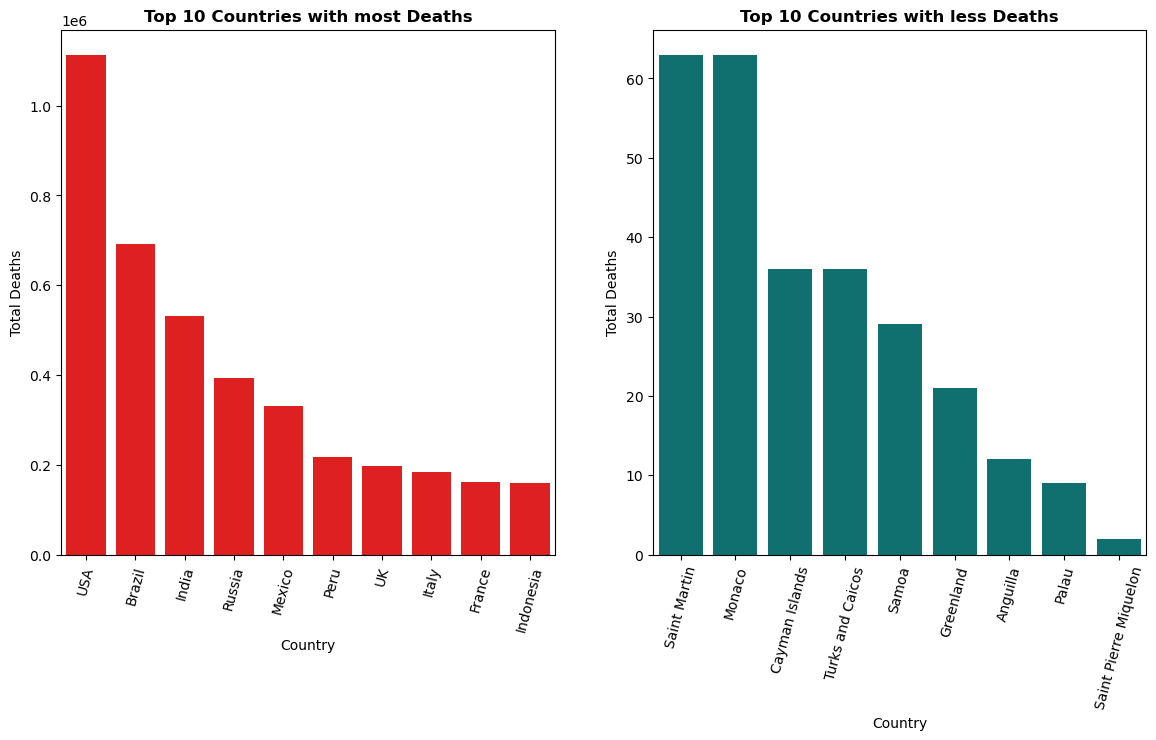

In [61]:
plt.figure(figsize=(14, 15))
plt.subplot(2, 2, 1)
sns.barplot(top_cases,x='Country',y='Total Deaths', color='red')
plt.title('Top 10 Countries with most Deaths',fontweight='bold')
plt.xticks(rotation=75)
plt.subplot(2,2,2)
sns.barplot(less_cases,x='Country',y='Total Deaths', color='teal')
plt.title('Top 10 Countries with less Deaths',fontweight='bold')
plt.xticks(rotation=75)
plt.show()

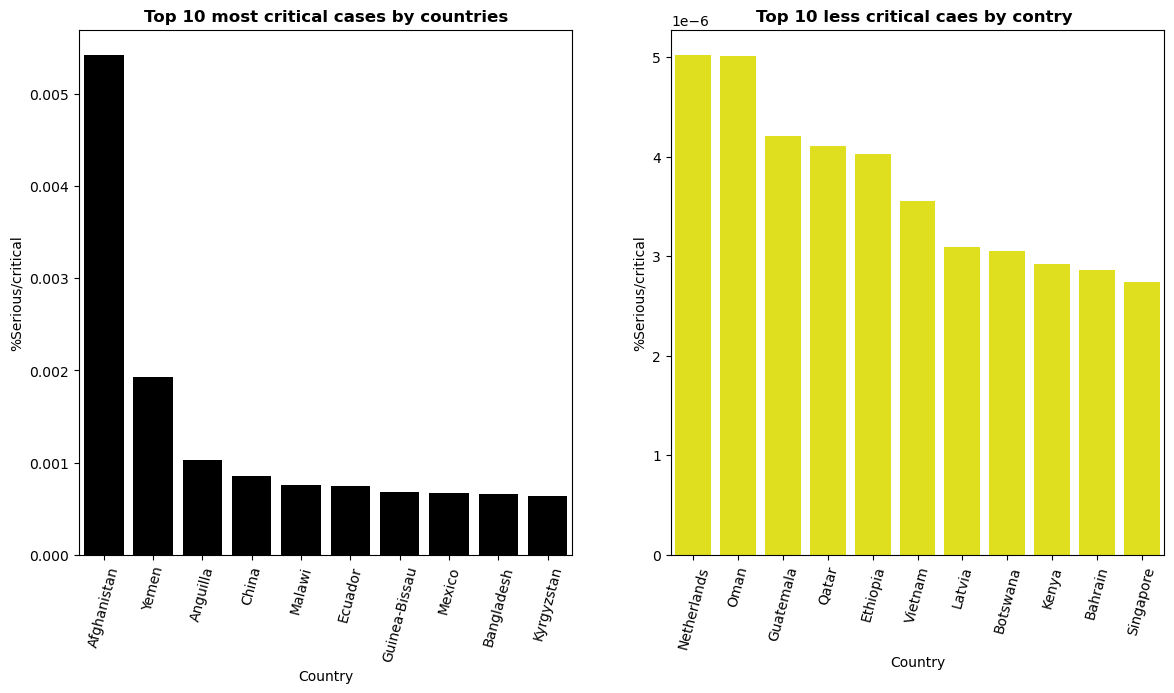

In [63]:
plt.figure(figsize=(14, 15))
plt.subplot(2, 2, 1)
sns.barplot(most_serious_by_country,x='Country',y='%Serious/critical', color='black')
plt.title('Top 10 most critical cases by countries',fontweight='bold')
plt.xticks(rotation=75)
plt.subplot(2,2,2)
sns.barplot(less_serious_by_country,x='Country',y='%Serious/critical', color='yellow')
plt.title('Top 10 less critical caes by contry ',fontweight='bold')
plt.xticks(rotation=75)
plt.show()

<Figure size 1700x1200 with 0 Axes>

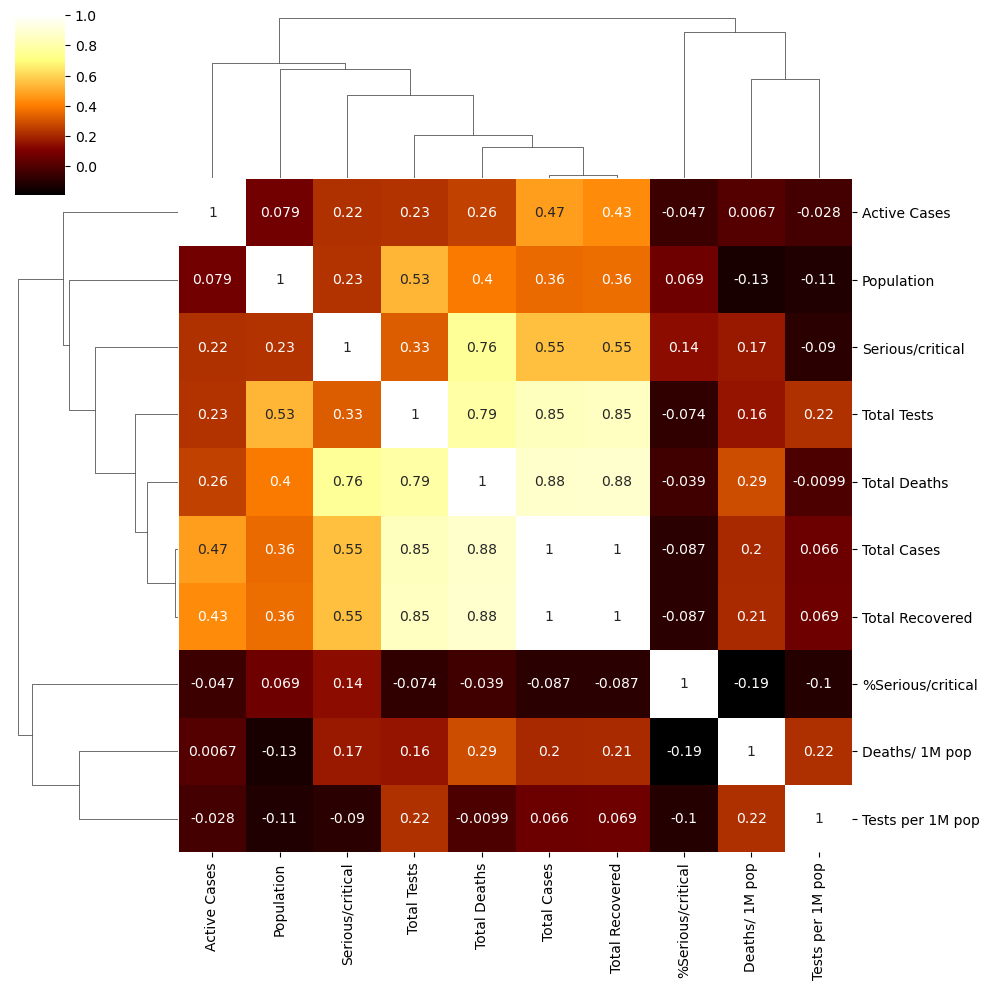

In [59]:
corr=df.corr()
plt.figure(figsize=(17,12))
sns.clustermap(corr,annot=True,cmap='afmhot');


In [71]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",
             scope="world",color="Total Deaths",size="Total Deaths",
             size_max=45,title="Covid-19 Cases of death around the Globe 2022",color_continuous_scale='turbo')
fig.show()

In [69]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",
             scope="world",color="Total Recovered",size="Total Deaths",
             size_max=45,title="Covid-19 Cases of recovery around the Globe 2022",color_continuous_scale='deep')
fig.show()